#  Modeling Coffee Reviewing with Linear Regression
### Will Rodman - Final Project - Math 6040 Linear Models

This project studies data from [coffeereviews.com](www.coffeereviews.com), which was obtained through web scraping and published on [kaggle.com](www.kaggle.com). The goal is to develop a linear regression model that predicts individual ratings for coffee beans. Additonal quesitons answered about the data include: 

- What features of a coffee mean determine best a ratings? 
- Are there types of coffee beans with different tiers of ratings? 
- How well can a linear model be fit to predict coffee bean ratings? 

Data source: [Link](https://www.kaggle.com/datasets/hanifalirsyad/coffee-scrap-coffeereview/versions/2/data?select=coffee_df.csv)

In [15]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#### Sprint 1: Loading and cleaning the dataset. 

The CSV files [coffee_df](./data/coffee_df.csv) and [coffee_analysis](./data/coffee_analysis.csv) are two different versions of the data that has been scraped. In order to use feature from both datasets, I merge the two datasets and drop the duplicate values.

In [2]:
coffee_columns = ['acid', 'body', 'flavor', 'aftertaste', 'desc_1']
analysis_columns = ['roaster', 'roast', 'loc_country', '100g_USD', 'rating', 'desc_1']

coffee_df = pd.read_csv('data/coffee_df.csv', usecols=coffee_columns)
analysis_df = pd.read_csv('data/coffee_analysis.csv', usecols=analysis_columns)

df = pd.merge(coffee_df, analysis_df, on='desc_1', how='inner')

df.drop(['desc_1'], axis=1, inplace=True)
df.dropna(inplace=True)

dtypes = {
    'acid': int,
    'body': int,
    'flavor': int,
    'aftertaste': int,
    'roaster': 'category',
    'roast': 'category',
    'loc_country': 'category',
    '100g_USD': float,
    'rating': int,
}

df = df.astype(dtypes)

In [3]:
print("Dimensions", df.shape)
print('Data Types: \n', df.dtypes)
df.head(10)

Dimensions (1779, 9)
Data Types: 
 acid              int64
body              int64
flavor            int64
aftertaste        int64
roaster        category
roast          category
loc_country    category
100g_USD        float64
rating            int64
dtype: object


,acid,body,flavor,aftertaste,roaster,roast,loc_country,100g_USD,rating
0,9,9,9,8,Equator Coffees,Medium-Light,United States,12.93,94
1,9,9,9,8,Wonderstate Coffee,Medium-Light,United States,6.17,93
2,9,8,9,8,Bird Rock Coffee Roasters,Medium-Light,United States,5.58,92
3,8,8,9,8,Chromatic Coffee,Medium-Light,United States,9.17,92
4,8,9,9,8,GK Coffee,Medium-Light,Taiwan,8.80,92
5,8,8,9,8,Small Eyes Cafe,Light,Taiwan,6.08,92
6,9,8,9,7,Speckled Ax,Medium-Light,United States,5.88,91
7,9,8,9,7,Tico Coffee Roasters,Medium-Light,United States,5.88,91
8,9,9,9,9,Magnolia Coffee,Light,United States,13.23,95
9,9,9,9,8,Bird Rock Coffee Roasters,Light,United States,8.11,94


Since the `roast` feature is an ordinal categorical data type, this feature needs to be cartegoicaly encoded. 

Code table for the `roast` feature: 
| Roast       | Code |
|-------------|------|
| Light        | 0   |
| Medium-Light | 1   |
| Medium       | 2   |
| Medium-Dark  | 3   |
| Dark         | 4   |


In [4]:
# Remove ".codes" if you want to keep the name values.
roast_types = ['Light', 'Medium-Light', 'Medium', 'Medium-Dark', 'Dark']
df['roast'] = pd.Categorical(df['roast'], categories=roast_types, ordered=True).codes

In [27]:
df['body'].value_counts()

9     1145
8      620
7       13
10       1
Name: body, dtype: int64

#### Sprint 2: Analysis of features inside the dataset. 

Now that the dataset is clean, all the features in the dataset can be analyzed. This analysis will determine which features can be used in the linear regression model. Specifically for ordinal values, I will compute the Pearson correlation and a distribution test.



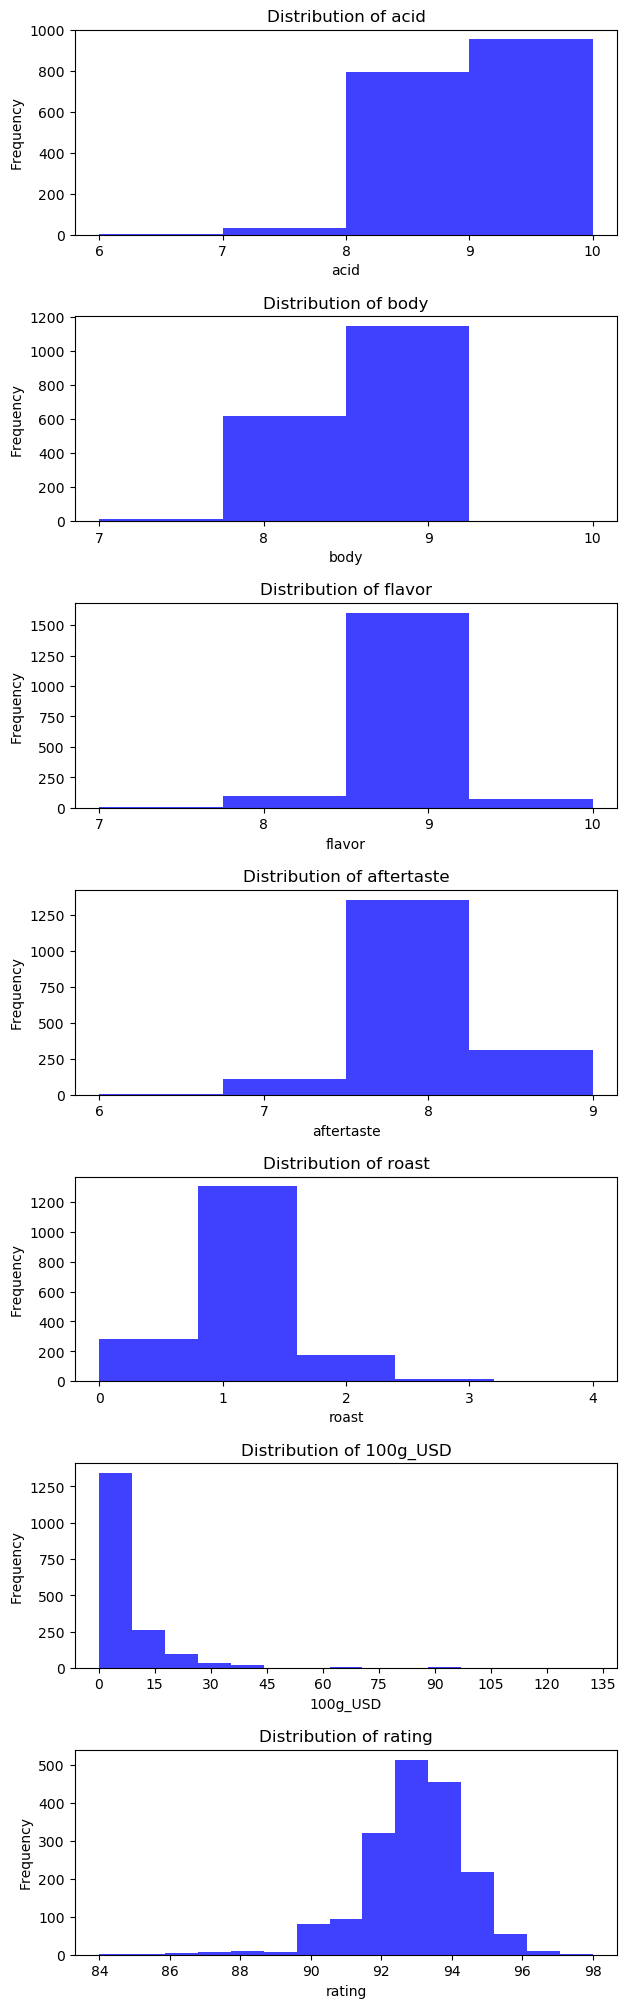

In [29]:
ordinal_features = ['acid', 'body', 'flavor', 'aftertaste', 'roast', '100g_USD', 'rating']
features_bins = [4, 4, 4, 4, 5, 15, 15]

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(7, 25))
fig.subplots_adjust(hspace=0.4)

for i, column in enumerate(ordinal_features):
    axs[i].hist(df[column], bins=features_bins[i], color='blue', alpha=0.75)
    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))

    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlabel(column)


Looking at the plots of the distribution for the ordinal features, 